In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Let's checkout if there is a correlation between the price and the engine size

In [5]:
df['price'].describe()

count     205
unique    187
top         ?
freq        4
Name: price, dtype: object

### First we need to clean the data

In [7]:
non_question_prices = df['price'][df['price'] != '?']
average_price = np.mean(non_question_prices.astype(float))

df['price'] = df['price'].replace('?', average_price)
df['price'] = df['price'].astype(float)

### Now we create the model

In [23]:
X = df[["engine-size"]].astype(float)
Y = df["price"] / 100

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size= 25 , random_state=42)
model = LinearRegression().fit(xTrain,yTrain)

print(model.score(xTrain, yTrain))

0.7220180087499396


In [24]:
yPred = model.predict(xTest)

mse = mean_squared_error(yTest, yPred)
print("Mean Squared Error:", np.sqrt(mse))

Mean Squared Error: 30.754736606662718


In [28]:
r2 = r2_score(yTest, yPred)
print("R-squared Score:", r2)

R-squared Score: 0.8658188907313097


### Lets first visualize our data:

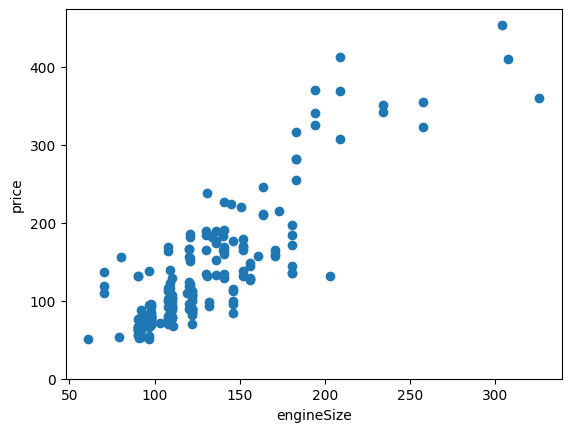

In [26]:
engineSize = df["engine-size"]
price = df['price'] / 100
plt.scatter(engineSize,price)
plt.xlabel("engineSize")
plt.ylabel("price")
plt.ylim(0,)
plt.show()

### Now lets check the model:

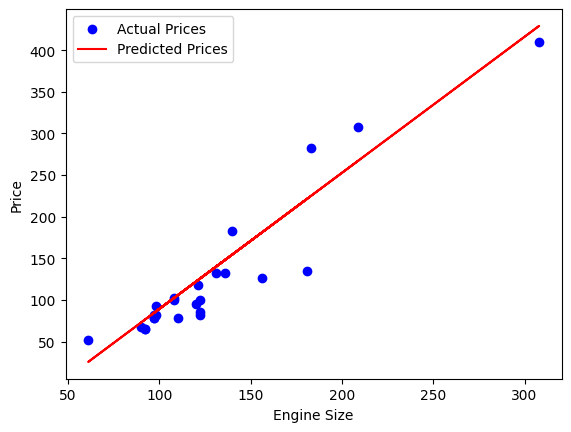

In [29]:
plt.scatter(xTest, yTest, color='blue', label='Actual Prices')
plt.plot(xTest, yPred, color='red', label='Predicted Prices')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()